# Explorationo of Air Pollution Data
### Source of the data can be found  [here](https://www.kaggle.com/datasets/mayukh18/deap-deciphering-environmental-air-pollution)

In [23]:
# importing libraries for data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# creating a dataframe from csv file and displaying first ten rows

df = pd.read_csv("pollution_data.csv")

df.head(10)

,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
0,2019-01-01,albuquerque,bernalillo,NM,"1,77,171","4,99,456",19.038463,0.0,35.107209,-106.617209,...,127.0,18.0,5303.29,48.0,0.3,27.3,3.8,839.84,54.0,0.319492
1,2019-01-01,atlanta,fulton,GA,"2,83,093","7,63,811",29.295609,0.0,33.760109,-84.402826,...,27.0,14.0,280.83,23.0,0.1,4.5,1.7,12.11,44.0,23.304216
2,2019-01-01,austin,travis,TX,"2,68,732","9,76,194",27.286079,0.0,30.283333,-97.750641,...,NaN,NaN,NaN,NaN,0.2,14.0,6.8,162.34,67.0,14.333042
3,2019-01-01,baltimore,baltimo,MD,"1,91,486","4,09,167",12.961132,0.0,39.305833,-76.610417,...,15.0,6.0,74.76,24.0,0.1,24.0,8.5,355.46,70.0,6.403240
4,2019-01-01,boise,ada,ID,"1,05,237","3,63,293",12.640954,0.0,43.604545,-116.202424,...,20.0,5.0,170.86,47.0,0.1,11.3,2.2,46.19,92.0,0.000000
5,2019-01-01,boston,suffolk,MA,"2,64,296","5,40,489",17.221880,0.0,42.351282,-71.062051,...,NaN,NaN,NaN,NaN,2.6,46.0,15.7,1244.66,120.0,86.681580
6,2019-01-01,brooklyn,kings,NY,"9,64,005","16,10,930",52.130628,0.0,40.653269,-73.956538,...,NaN,NaN,NaN,NaN,0.3,33.3,12.2,593.08,88.0,26.824525
7,2019-01-01,charlotte,mecklenburg,NC,"2,63,196","8,27,361",30.960487,0.0,35.196351,-80.828108,...,NaN,NaN,NaN,NaN,0.1,15.1,4.6,173.58,82.0,0.000000
8,2019-01-01,chicago,cook,IL,"13,96,803","37,67,856",148.042151,0.0,41.858851,-87.676437,...,70.0,13.0,2756.66,47.0,0.8,16.5,5.0,84.51,191.0,3.606315
9,2019-01-01,columbia,richland,SC,"89,669","3,23,640",11.010421,0.0,34.011818,-81.013333,...,NaN,NaN,NaN,NaN,0.2,8.2,5.3,66.03,20.0,1.231301


In [25]:
# Looking at how many records are in the df using shape

df.shape

(35596, 71)

In [26]:
# Looking at the last 7 records of df

df.tail(7)

,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
35589,2020-12-11,san francisco,san francisco,CA,"3,41,807","5,41,498",15.626241,0.0,37.770154,-122.418308,...,NaN,NaN,NaN,NaN,0.5,17.8,3.2,124.27,60.0,1.110022
35590,2020-12-11,san jose,santa clara,CA,"6,35,594","13,01,976",43.472052,0.0,37.308947,-121.872281,...,NaN,NaN,NaN,NaN,0.2,12.2,4.7,150.47,23.0,3.436658
35591,2020-12-11,seattle,king,WA,"7,33,494","14,99,669",50.982852,0.0,47.590794,-122.325714,...,NaN,NaN,NaN,NaN,0.2,17.7,4.5,161.93,182.0,0.000000
35592,2020-12-11,springfield,sangamon,IL,"60,167","1,35,181",6.221078,0.0,39.783158,-89.641842,...,NaN,NaN,NaN,NaN,1.2,15.3,4.5,220.83,24.0,7.243005
35593,2020-12-11,staten island,richmond,NY,"1,59,253","3,16,926",14.491843,0.0,40.588571,-74.150000,...,NaN,NaN,NaN,NaN,0.2,11.5,6.2,92.10,58.0,35.199504
35594,2020-12-11,tallahassee,leon,FL,"76,894","2,15,608",8.184401,0.0,30.456000,-84.262500,...,NaN,NaN,NaN,NaN,4.5,15.1,8.3,134.12,17.0,0.927474
35595,2020-12-11,tucson,pima,AZ,"3,17,121","7,21,952",31.191188,0.0,32.217037,-110.949815,...,55.0,27.0,1950.18,189.0,0.1,8.0,3.0,28.64,169.0,1.676946


In [27]:
df.keys()

Index(['Date', 'City', 'County', 'State', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'latitude', 'longitude', 'o3_min', 'o3_max', 'o3_median', 'o3_variance',
       'o3_count', 'pressure_min', 'pressure_max', 'pressure_median',
       'pressure_variance', 'pressure_count', 'pm25_min', 'pm25_max',
       'pm25_median', 'pm25_variance', 'pm25_count', 'humidity_min',
       'humidity_max', 'humidity_median', 'humidity_variance',
       'humidity_count', 'temperature_min', 'temperature_max',
       'temperature_median', 'temperature_variance', 'temperature_count',
       'dew_min', 'dew_max', 'dew_median', 'dew_variance', 'dew_count',
       'no2_min', 'no2_max', 'no2_median', 'no2_variance', 'no2_count',
       'wind-speed_min', 'wind-speed_max', 'wind-speed_median',
       'wind-speed_variance', 'wind-speed_count', 'co_min', 'co_max',
       'co_median', 'co_variance', 'co_count', 'so2_min', 'so2_max',
       'so2_med

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35596 entries, 0 to 35595
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            35596 non-null  object 
 1   City                            35596 non-null  object 
 2   County                          35596 non-null  object 
 3   State                           35596 non-null  object 
 4   Population Staying at Home      35596 non-null  object 
 5   Population Not Staying at Home  35596 non-null  object 
 6   mil_miles                       35596 non-null  float64
 7   past_week_avg_miles             35596 non-null  float64
 8   latitude                        35596 non-null  float64
 9   longitude                       35596 non-null  float64
 10  o3_min                          33950 non-null  float64
 11  o3_max                          33950 non-null  float64
 12  o3_median                       

In [29]:
keys_list = ['Date', 'City', 'County', 'State', 'Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'latitude', 'longitude', 'o3_min', 'o3_max', 'o3_median', 'o3_variance',
       'o3_count', 'pressure_min', 'pressure_max', 'pressure_median',
       'pressure_variance', 'pressure_count', 'pm25_min', 'pm25_max',
       'pm25_median', 'pm25_variance', 'pm25_count', 'humidity_min',
       'humidity_max', 'humidity_median', 'humidity_variance',
       'humidity_count', 'temperature_min', 'temperature_max',
       'temperature_median', 'temperature_variance', 'temperature_count',
       'dew_min', 'dew_max', 'dew_median', 'dew_variance', 'dew_count',
       'no2_min', 'no2_max', 'no2_median', 'no2_variance', 'no2_count',
       'wind-speed_min', 'wind-speed_max', 'wind-speed_median',
       'wind-speed_variance', 'wind-speed_count', 'co_min', 'co_max',
       'co_median', 'co_variance', 'co_count', 'so2_min', 'so2_max',
       'so2_median', 'so2_variance', 'so2_count', 'pm10_min', 'pm10_max',
       'pm10_median', 'pm10_variance', 'pm10_count', 'wind-gust_min',
       'wind-gust_max', 'wind-gust_median', 'wind-gust_variance',
       'wind-gust_count', 'pp_feat']

for item in keys_list:
    print(item)

Date
City
County
State
Population Staying at Home
Population Not Staying at Home
mil_miles
past_week_avg_miles
latitude
longitude
o3_min
o3_max
o3_median
o3_variance
o3_count
pressure_min
pressure_max
pressure_median
pressure_variance
pressure_count
pm25_min
pm25_max
pm25_median
pm25_variance
pm25_count
humidity_min
humidity_max
humidity_median
humidity_variance
humidity_count
temperature_min
temperature_max
temperature_median
temperature_variance
temperature_count
dew_min
dew_max
dew_median
dew_variance
dew_count
no2_min
no2_max
no2_median
no2_variance
no2_count
wind-speed_min
wind-speed_max
wind-speed_median
wind-speed_variance
wind-speed_count
co_min
co_max
co_median
co_variance
co_count
so2_min
so2_max
so2_median
so2_variance
so2_count
pm10_min
pm10_max
pm10_median
pm10_variance
pm10_count
wind-gust_min
wind-gust_max
wind-gust_median
wind-gust_variance
wind-gust_count
pp_feat


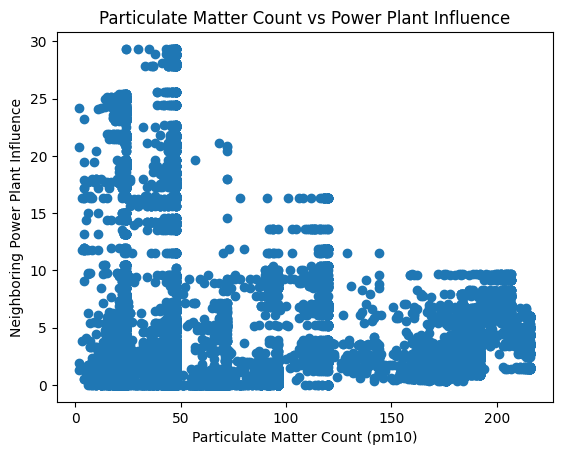

In [30]:
plt.scatter(df['pm10_count'], df['pp_feat'])
plt.xlabel("Particulate Matter Count (pm10)")
plt.ylabel("Neighboring Power Plant Influence")
plt.title("Particulate Matter Count vs Power Plant Influence")
plt.show()

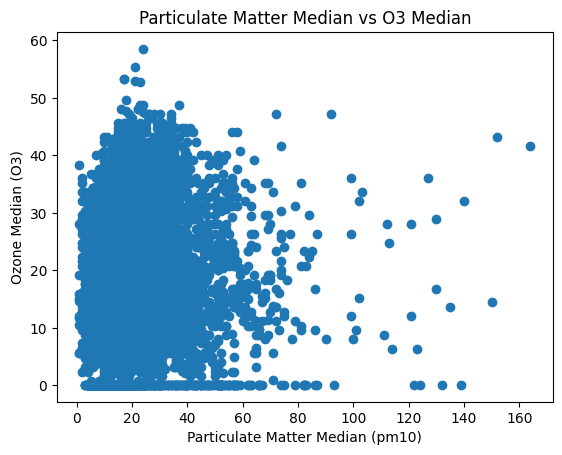

In [31]:
plt.scatter(df['pm10_median'], df['o3_median'])
plt.xlabel("Particulate Matter Median (pm10)")
plt.ylabel("Ozone Median (O3)")
plt.title("Particulate Matter Median vs O3 Median")
plt.show()

In [32]:
# Doing a type check on a cell 
type(df['Population Not Staying at Home'][5])

str

In [33]:
# looping through the array in order to remove the comma
i = 0
while i < len(df['Population Not Staying at Home']):
    df['Population Not Staying at Home'][i] = df['Population Not Staying at Home'][i].replace(",","")
    i += 1

C:\Users\dvisi\AppData\Local\Temp\ipykernel_17304\1481582488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population Not Staying at Home'][i] = df['Population Not Staying at Home'][i].replace(",","")


In [34]:
# looping through the array in order to remove the comma
i = 0
while i < len(df['Population Staying at Home']):
    df['Population Staying at Home'][i] = df['Population Staying at Home'][i].replace(",","")
    i += 1


C:\Users\dvisi\AppData\Local\Temp\ipykernel_17304\2507408201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population Staying at Home'][i] = df['Population Staying at Home'][i].replace(",","")


In [35]:
# converting the data to numeric and displaying the mean values of each population category
df["Population Not Staying at Home"] = df["Population Not Staying at Home"].astype(int)
df['Population Staying at Home'] = df['Population Staying at Home'].astype(int)
pop_home = df['Population Not Staying at Home'].mean().round(2)
pop_not_home = df['Population Staying at Home'].mean().round(2)

print(f"The mean population for people staying at home is {pop_home} \n")
print(f"The mean population for people staying at home is {pop_not_home} ")

The mean population for people staying at home is 1124679.3 

The mean population for people staying at home is 337261.34 


In [36]:
# using describe on the dataset
df.describe()

,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,o3_min,o3_max,o3_median,o3_variance,...,pm10_max,pm10_median,pm10_variance,pm10_count,wind-gust_min,wind-gust_max,wind-gust_median,wind-gust_variance,wind-gust_count,pp_feat
count,3.559600e+04,3.559600e+04,35596.000000,35596.0,35596.000000,35596.000000,33950.000000,33950.000000,33950.000000,33950.000000,...,16965.000000,16965.000000,1.696500e+04,16965.000000,34217.000000,34217.000000,34217.000000,34217.000000,34217.000000,35596.000000
mean,3.372613e+05,1.124679e+06,46.856694,0.0,37.094422,-97.172019,6.347216,41.418074,22.175976,6902.829271,...,55.385028,17.666490,3.872913e+03,76.844916,0.666110,14.475015,5.336239,154.271994,81.158225,8.435058
std,3.820851e+05,1.256587e+06,52.963897,0.0,5.230635,18.310666,8.571965,57.404942,28.127937,53155.246079,...,90.403915,10.997532,3.369546e+04,60.742441,1.647992,7.953625,3.185103,389.347015,54.236630,24.625900
min,1.257200e+04,4.878600e+04,1.461991,0.0,21.304651,-157.843488,0.100000,0.100000,0.100000,0.000000,...,2.000000,1.000000,0.000000e+00,2.000000,0.100000,0.100000,0.100000,0.000000,2.000000,0.000000
25%,1.398185e+05,4.510015e+05,17.931973,0.0,33.502593,-112.070988,0.800000,25.600000,14.500000,233.375000,...,23.000000,10.000000,1.563600e+02,24.000000,0.100000,9.700000,3.000000,59.660000,43.000000,0.338402
50%,2.196440e+05,7.387180e+05,31.174508,0.0,37.549032,-93.103947,4.000000,33.600000,20.800000,563.080000,...,36.000000,15.000000,4.221200e+02,48.000000,0.200000,13.000000,4.600000,106.340000,66.000000,1.771250
75%,3.912720e+05,1.326483e+06,52.377897,0.0,40.724364,-82.979783,9.600000,42.400000,27.200000,1191.895000,...,58.000000,21.000000,1.164700e+03,114.000000,0.400000,17.500000,7.000000,181.020000,111.000000,6.111875
max,3.644862e+06,8.636354e+06,443.915641,0.0,47.590794,-71.062051,500.000000,500.000000,500.000000,612542.000000,...,999.000000,164.000000,1.003710e+06,216.000000,36.000000,327.000000,94.000000,26644.700000,329.000000,304.387974


In [37]:
# calculating median particulate matter for each state
df.groupby(['State'])['pm10_count'].mean().round(2)

State
AR       NaN
AZ    192.13
CA     45.98
CO    195.69
CT     46.60
FL    101.39
GA     22.77
HI     45.24
ID     63.36
IL     45.56
IN     22.60
KS       NaN
MA       NaN
MD     22.23
MI     30.88
MN     46.12
MS     38.24
NC     23.18
NE     23.39
NM     62.86
NV    168.05
NY       NaN
OH       NaN
OK     93.24
OR       NaN
PA       NaN
RI       NaN
SC       NaN
TN       NaN
TX    162.11
UT       NaN
VA       NaN
WA       NaN
WI     75.96
Name: pm10_count, dtype: float64

In [38]:
# checking for duplicates
df.duplicated().sum()

0

In [39]:
# Looking for missing values
df.isna().sum()

Date                             0
City                             0
County                           0
State                            0
Population Staying at Home       0
                              ... 
wind-gust_max                 1379
wind-gust_median              1379
wind-gust_variance            1379
wind-gust_count               1379
pp_feat                          0
Length: 71, dtype: int64

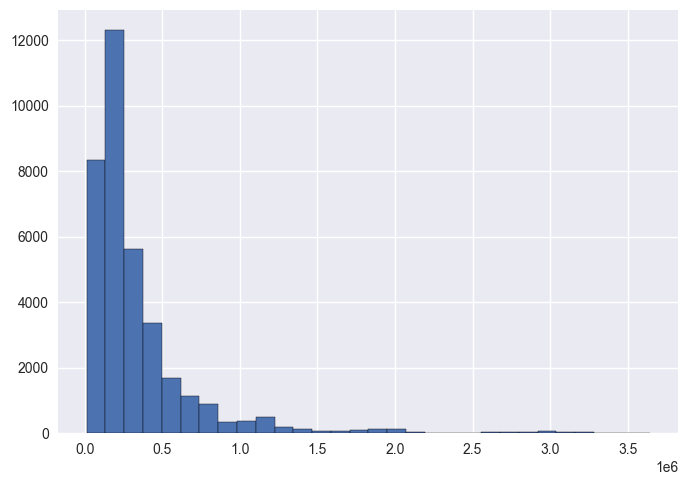

In [40]:
plt.style.use('seaborn')
df['Population Staying at Home'].hist(bins=30, edgecolor='black');

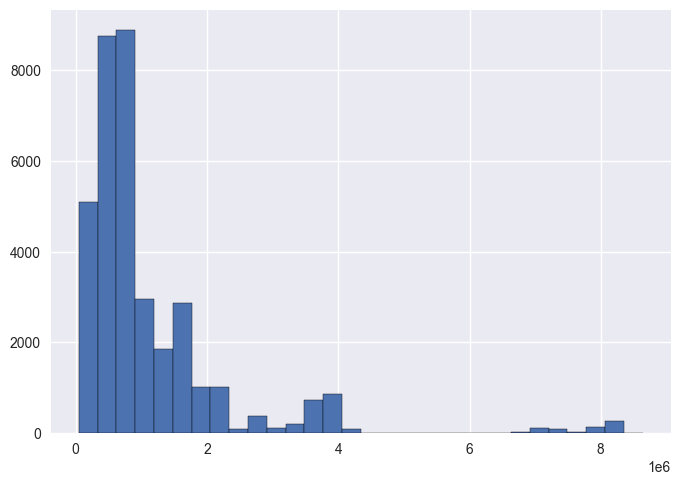

In [41]:
plt.style.use('seaborn')
df['Population Not Staying at Home'].hist(bins=30, edgecolor='black');

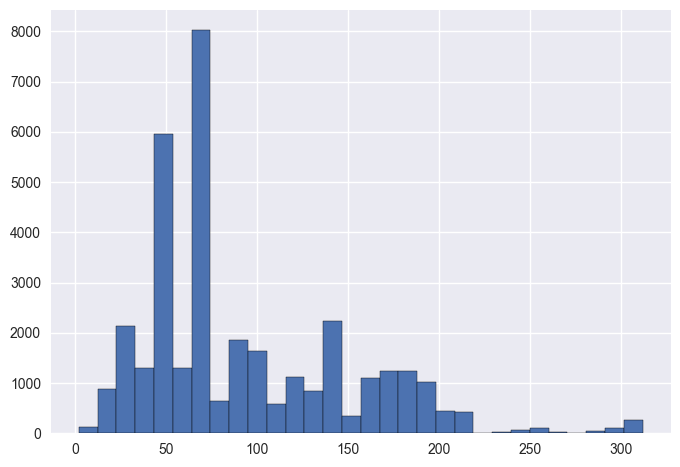

In [42]:
plt.style.use('seaborn')
df['pm25_count'].hist(bins=30, edgecolor='black');

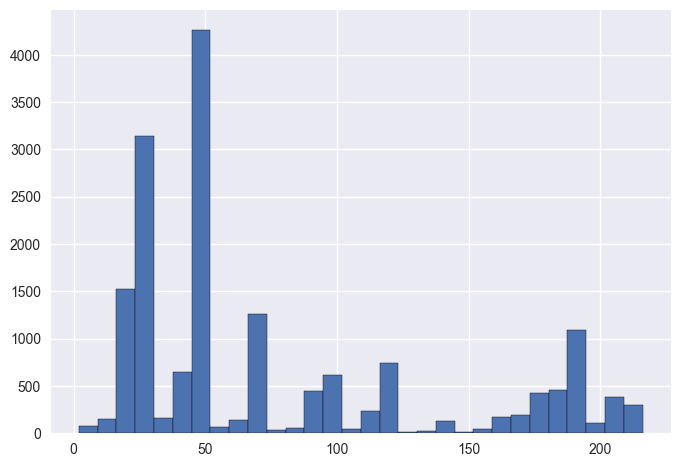

In [43]:
plt.style.use('seaborn')
df['pm10_count'].hist(bins=30, edgecolor='black');

In [44]:
def histo(features):
    for item in features:
        plt.style.use('seaborn')
        df[item].hist(bins=50, edgecolor='black')


In [45]:
key_features = ['Population Staying at Home',
       'Population Not Staying at Home', 'mil_miles', 'past_week_avg_miles',
       'o3_count', 'pm25_count', 'no2_count', 'co_count', 'so2_count', 'pm10_count',
       'pp_feat']

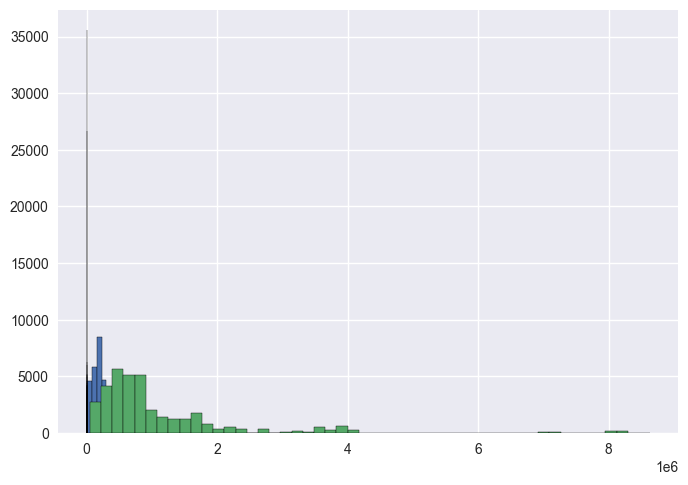

In [46]:
histo(key_features)